# Pandas

This last lecture borrows from [Julia Evans's](http://jvns.ca/) [Pandas cookbook](https://github.com/jvns/pandas-cookbook), a tutorial to introduce people to lots of Pandas's features.

# `DataFrame` and `Series`

The key value types offered by Pandas are the `Series` and the `DataFrame`.

- A `DataFrame` is a similar to a dataframe in R; it represents a data table with labeled rows and columns, where the data type is the same in each column, but may differ between columns. A `DataFrame` is mutable, and of variable length in the sense that columns can be added and removed efficiently. The columns are formed by `Series` objects, each of the same length.

- A `Series` represents a single data column with row labels; it is a mutable value of fixed length, and unlike Python lists but like NumPy objects, it is *homogeneous*.

While both objects are mutable, wherever possible without too much loss of efficiency, operations leave the original object untouched. When unsure, you will need to check in the manual exactly which operations create *views* on the data without copying it, and which operations actually copy the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
se = pd.Series([3,6,2,8],index=['a','bunch','of','rows'])
se

a        3
bunch    6
of       2
rows     8
dtype: int64

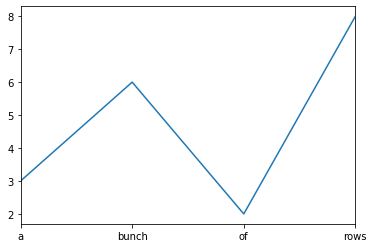

In [5]:
se.plot(xticks=range(4))

In [6]:
df = pd.DataFrame(np.random.randn(5, 3),
                  index   = pd.date_range('1/1/2000', periods=5), 
                  columns = list("ABC"))
df

,A,B,C
2000-01-01,-1.412829,-2.173763,-0.918745
2000-01-02,-0.396833,-0.407808,-0.261408
2000-01-03,0.321106,0.926917,-0.560275
2000-01-04,-0.516287,0.097268,0.342532
2000-01-05,0.018481,-0.218418,0.051419


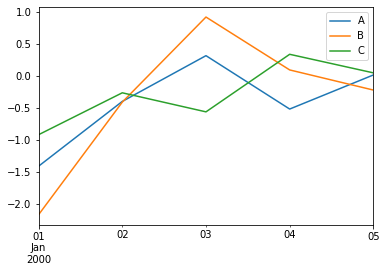

In [7]:
df.plot()

In [8]:
s = pd.Series([0,1,4,9,16,25],name='squares')
s

0     0
1     1
2     4
3     9
4    16
5    25
Name: squares, dtype: int64

The row labels are often left at their defaults of 0, 1, ...

# Indexing

Indexing is pretty complicated in Pandas! Here is a quick indexing cookbook.

### Getting the column/row index object from a `DataFrame` 

Indexing in Pandas is handled by "index objects". There is one associated with the rows, which is present for both `Series` and `DataFrame`, and for the latter another index object is associated with the columns.

In [9]:
print("Column index:", df.columns)
print("Row    index:", df.index)

Column index: Index(['A', 'B', 'C'], dtype='object')
Row    index: DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')


### Index a `DataFrame` with a column label to extract a series


In [10]:
for colname in df.columns:
    print("Column (",colname,"):", list(df[colname]))

Column ( A ): [-1.412829346169673, -0.3968325431011455, 0.3211055733224964, -0.5162869613182576, 0.01848091591918413]
Column ( B ): [-2.173762539811726, -0.40780787739532737, 0.9269167009286136, 0.09726828754472683, -0.2184182777478859]
Column ( C ): [-0.918744585859932, -0.26140848891355634, -0.5602750468801375, 0.34253206001206987, 0.05141944021190152]


**Is it a view or a copy?**

In [11]:
se = df['A']
se[se.index[2]] = 1000
se

2000-01-01      -1.412829
2000-01-02      -0.396833
2000-01-03    1000.000000
2000-01-04      -0.516287
2000-01-05       0.018481
Freq: D, Name: A, dtype: float64

In [12]:
df

,A,B,C
2000-01-01,-1.412829,-2.173763,-0.918745
2000-01-02,-0.396833,-0.407808,-0.261408
2000-01-03,1000.000000,0.926917,-0.560275
2000-01-04,-0.516287,0.097268,0.342532
2000-01-05,0.018481,-0.218418,0.051419


Clearly, if we select a single column that means we obtain a *view* of the series contained in the original dataframe.

### Index a `DataFrame` with a list of column labels to extract another `DataFrame` with those columns


In [13]:
df[['A','C']]

,A,C
2000-01-01,-1.412829,-0.918745
2000-01-02,-0.396833,-0.261408
2000-01-03,1000.000000,-0.560275
2000-01-04,-0.516287,0.342532
2000-01-05,0.018481,0.051419


**Is it a view or a copy?**

If you select multiple columns, the result is a copy! It is pretty hard to keep track of when Pandas will make views or copies for you. You'll have to read the documentation and perform experiments to make sure, in cases where it matters.

### Index a `Series` with with an integer *or* a row label to get a scalar entry

In [14]:
se

2000-01-01      -1.412829
2000-01-02      -0.396833
2000-01-03    1000.000000
2000-01-04      -0.516287
2000-01-05       0.018481
Freq: D, Name: A, dtype: float64

In [15]:
dates = se.index
se[1], dates[1], se[dates[1]]

(-0.3968325431011455,
 Timestamp('2000-01-02 00:00:00', freq='D'),
 -0.3968325431011455)

### Index a `Series` with a *list* of integers or row labels to get another `Series`

In [16]:
se[[1,3]]

2000-01-02   -0.396833
2000-01-04   -0.516287
Name: A, dtype: float64

**Is it a view or a copy?**

As for `DataFrame`, this yields not a view, but a new series whose elements are copied from the old one.

### More sophisticated indexing

Pandas supports two constructions for indexing either rows, or subsets of rows and columns:

```
df.loc[<row label>]                : select the row with the given label
df.loc[<row label>,<column label>] : select the given entry
df.iloc[<row index>]               : select a row by numeric index
df.iloc[<row index>,<column index>]: select the indexed entry
```

The names can be replaced by lists of names, or by slices (using `:`). Here are examples:

In [ ]:
# get the second row by label
df.loc[dates[1]]

In [ ]:
# get the second row by index
df.iloc[1]

In [ ]:
# get the entry in row 2, column 2
df.loc[dates[1], 'B']

In [ ]:
# get the same entry by index
df.iloc[1,1]

As before, instead of single indices, you can use lists of indices or slices:

In [ ]:
# get the second column via loc, by using a row slice:
df.loc[:,'B']

In [ ]:
# reorder columns
df.loc[:,list("BAC")]
# same as: df[list("BAC")]

# Loading data files and `DataFrame`

First, we'll import Pandas and make a convenient variable indicating where our data is saved.

Our data is in `csv` format, which is easily readable by Pandas. Let's try to read in the bike data now. It counts how many people made use of certain bike paths in Montreal.

In [ ]:
import os
os.getcwd()

In [ ]:
data="../../pandas-cookbook-master/data/"

bikes = pd.read_csv(data+"bikes.csv", encoding="latin1")
type(bikes)

In [ ]:
bikes[:5]

Note that all data has been read into a single column; this is because pandas uses commas as a separator by default, and this file uses semicolons. This can be fixed with one of the optional arguments.

In [ ]:
bikes = pd.read_csv(data+"bikes.csv", encoding="latin1", sep=";")
bikes[:5]

### Dates

Let's have a look at the column of dates in the bike data. What type are these dates?

In [ ]:
bikes.loc[0, "Date"], type(bikes.loc[0, "Date"])

Since dates have been interpreted as string values, Pandas cannot chart or plot them appropriately, and also they will be sorted lexicographically, which orders dates in `MM/DD/YYYY` format incorrectly. `read_csv` allows control over this too:

- `parse_dates=[<date column names>]`: parse these columns as dates
- `dayfirst=True`: interpret date as day before month

Finally, for this data set it makes sense to use the dates as the row labels:

- `index_col=<column name>`: use that column to specify row names

In [ ]:
bikes = pd.read_csv(data+"bikes.csv", encoding="latin1", sep=";",
                    parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes[:5]

In [17]:
date_to_look_up = pd.to_datetime("01/03/2012", dayfirst=True)
date_to_look_up

Timestamp('2012-03-01 00:00:00')

In [ ]:
bikes.loc[date_to_look_up]

Finally, we note that two columns have missing values; we will drop these columns with the `drop` method:

In [ ]:
bikes = bikes.drop(["Brébeuf (données non disponibles)",
                    "St-Urbain (données non disponibles)"], axis=1)
bikes[:5]

### Plotting with Matplotlib integration

The `DataFrame` and `Series` objects have a method `plot` that uses Matplotlib to generate graphs.

In [ ]:
bikes["Berri 1"].plot(figsize=(12,5))

Note that the dates are interpreted correctly when making the plot.

When plotting a `DataFrame`, labels and line colours get added automatically.

In [ ]:
bikes.plot(figsize=(12,10))

# Example 1: on what weekday do people bike the most

Pandas dataframes support a multitude of methods and tools. We will show how to use them to answer the question of the bike path usage varied per weekday.

Since we have converted the "Date" column to actual Pandas date objects, it should not be a surprise that we can easily ask for the weekdays associated with those dates. We will first add a column to the dataframe with those weekdays.

Recall that the object that supports indexing rows can be accessed through `bikes.index`.

In [ ]:
bikes.index[:5]

Every individual date object can tell us which day of the week it is referring to.

In [ ]:
bikes.index[0].weekday()

The documentation informs us that 0=Monday. Now we see above that the index for `bikes` is in fact a `DatetimeIndex`, and conveniently it allows an easy way to work out the weekday for every element of the index at once:

In [ ]:
bikes.index.weekday[:5]

We will add this as a column to the data frame.

In [ ]:
bikes["weekday"] = bikes.index.weekday
bikes[:5]

Now we wish to accumulate the number of bike trips on each bike path, per weekday. A convenient way to do so is to use the split-apply-combine model, also used in databases:

- **split:** split the data into groups based on some criterion, in this case the weekday. This can be done with `groupby`.
- **apply:** apply a function to each group to bring out the information of interest. In this case, we want to accumulate the total number of bike trips in each column.
- **combine:** combine the results into a new dataframe for visualisation or further analysis.

There are several ways to do each of these steps. In this case, we need to split into groups based on the value in the weekday column, which can be done with the `groupby` method.

In [ ]:
bikes_split = bikes.groupby("weekday")
bikes_split

So the call to `groupby` results in an abstract object that contains the information about which row of the data frame belongs to which group. Now we need to accumulate the rows within each group. That can be done with the `aggregate` method. `aggregate` will apply a function to each column of a `DataFrame`.

In [ ]:
bikes_agg = bikes_split.aggregate(sum)
bikes_agg

You can see that the *group label* has now become the row index of the aggregated data. We wish to have more descriptive labels, so we replace the index:

In [ ]:
bikes_agg.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
bikes_agg

In [ ]:
bikes_agg.plot(kind="bar",figsize=(12,8),xticks=range(7))

# Example 2: Canadian weather data

We can download weather data for Montreal via the web form over here: [http://climate.weather.gc.ca/historical_data/search_historic_data_e.html](http://climate.weather.gc.ca/historical_data/search_historic_data_e.html).

We first figure out how the parameters of the request are encoded in the URL. The template turns out to be:

In [ ]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=51157&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

We can now use Pandas' `read_csv` method to grab data directly from this URL. We turn it into a function that correctly processes the headers and extracts the columns we are interested in.

In [ ]:
def download_weather_month(year, month):
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=0, index_col='Date/Time', parse_dates=True)
    selected_columns = weather_data.iloc[:,[4,5,6,7,8,12,20,26]]
    return selected_columns

# test:
download_weather_month(2019, 4)[:5]

We can now use this to easily download the weather data for the entire year. We make a list of `DataFrame` objects, one for each month, and then have Pandas concatenate them into a single `DataFrame`.

In [ ]:
weather_by_month = [download_weather_month(2018, i) for i in range(1, 13)]
weather2 = pd.concat(weather_by_month)

In [ ]:
weather = weather2

Now that we have collected the data we are interested in, we can save it as a `csv` file so that we won't need to do the scraping later on.

In [ ]:
weather.to_csv(data+"/weather_2018.csv")

Let's have a look at the temperature across the year:

In [ ]:
weather.iloc[:,4].plot(figsize=(15,6))

The last column of the data indicates the weather type. To determine which days it snowed, we will use Pandas string operations, like so:

In [ ]:
is_snowing = weather['Weather'].dropna().str.contains("Snow")
is_snowing[:5]

`is_snowing` will be a `Series` object with boolean values. We cannot plot it directly, but we can convert the booleans into floating point numbers and then plot that, to get an impression of when the snow fell.

In [ ]:
is_snowing.astype(float).plot(figsize=(15,6))

The results seem plausible, but a bit noisy. Let's aggregate snowfall per month. This can be done using the `resample` method: we downsample the data into month sized bins, and then calculate the average of each bin, to arrive at a new series.

In [ ]:
snow_by_month = is_snowing.astype(float).resample('M').apply(np.mean)
snow_by_month

Let's plot the results in a bar chart displaying frequency of snowy days by month.

In [ ]:
snow_by_month.plot(kind='bar', figsize=(15,6))